In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [8]:
Data = pd.read_csv('kc_house_data.csv')
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0


In [10]:
Data.shape

(21613, 21)

In [11]:
Data.drop('id',axis=1, inplace=True)

In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  yr_renovated   21613 non-null  int64  
 12  zipcode        21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
 17  sqft_lot       21613 non-null  int64  
 18  sqft_a

In [14]:
Data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,1.510697e+04,1788.390691,291.509045
std,3.673622e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,4.142051e+04,828.090978,442.575043
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,5.200000e+02,290.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,5.040000e+03,1190.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,7.618000e+03,1560.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.068800e+04,2210.000000,560.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.651359e+06,9410.000000,4820.000000


In [19]:
Data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot',
       'sqft_above', 'sqft_basement'],
      dtype='object')

In [21]:
Data.drop(['zipcode','lat','long'],axis=1,inplace=True )

In [23]:
Data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
sqft_lot         0
sqft_above       0
sqft_basement    0
dtype: int64

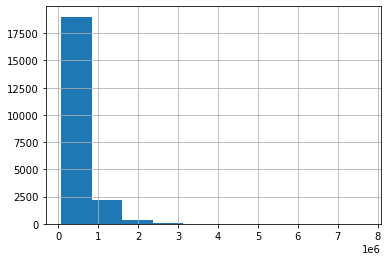

In [26]:
Data['price'].hist()
plt.show()

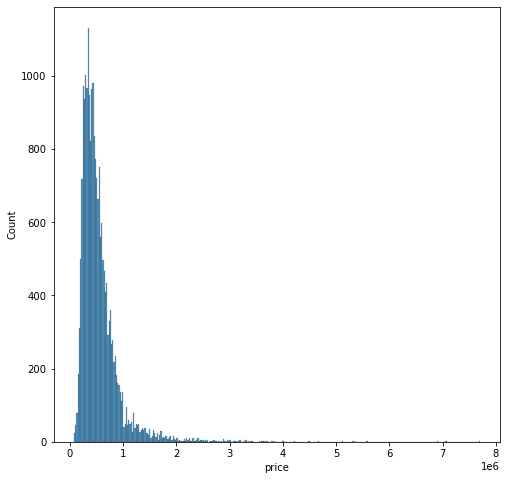

In [35]:
plt.figure(figsize=(8,8))
sns.histplot(Data['price']);

In [44]:
px.histogram(Data['price'])

In [45]:
px.box(Data['price'])

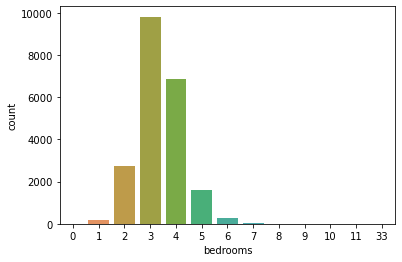

In [47]:
plt.figure()
sns.countplot(x=Data['bedrooms']);

<AxesSubplot:>

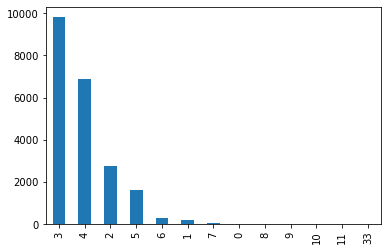

In [57]:
Data['bedrooms'].value_counts().plot(kind='bar')

In [61]:
px.bar(Data['bedrooms'].value_counts())

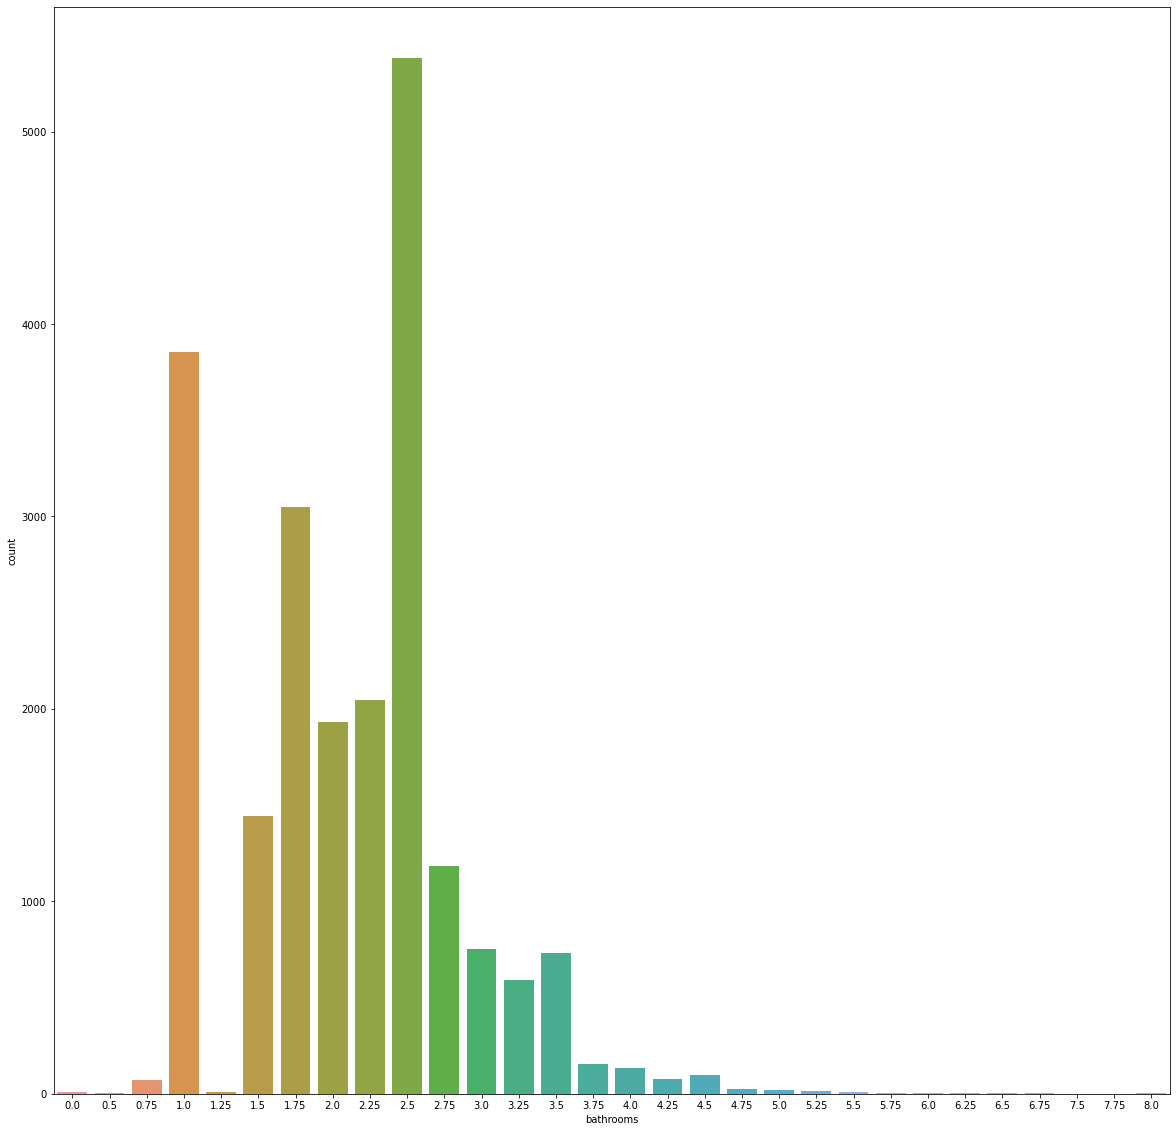

In [69]:
plt.figure(figsize=(20,20))
sns.countplot(x=Data['bathrooms']);

In [70]:
px.bar(Data['bathrooms'].value_counts())

<AxesSubplot:>

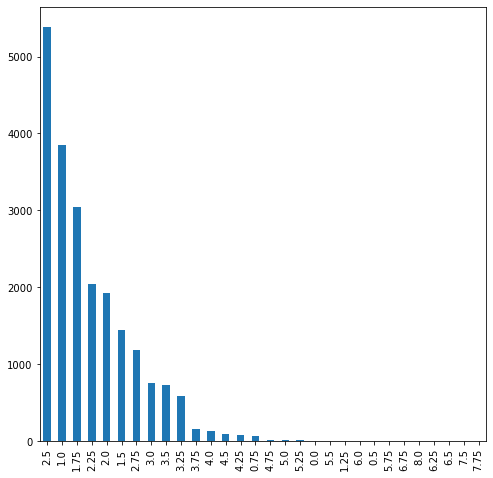

In [74]:
plt.figure(figsize=(8,8))
Data['bathrooms'].value_counts().plot(kind='bar')

In [79]:
px.bar(Data['grade'].value_counts())

<AxesSubplot:>

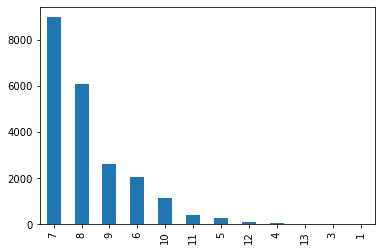

In [87]:
Data['grade'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='grade', ylabel='count'>

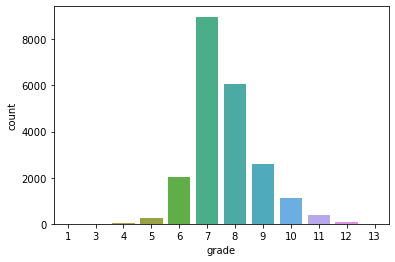

In [92]:
sns.countplot(x=Data['grade'])

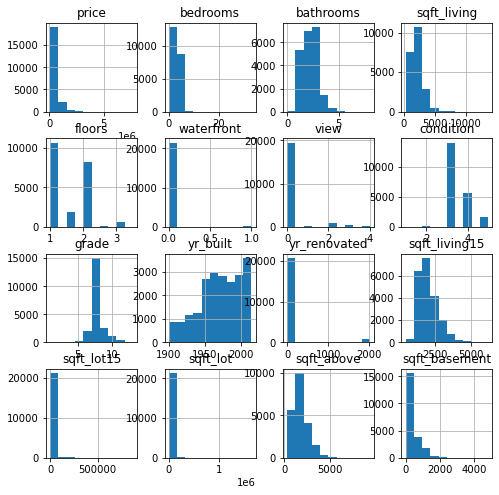

In [97]:

Data.hist(figsize=(8,8));

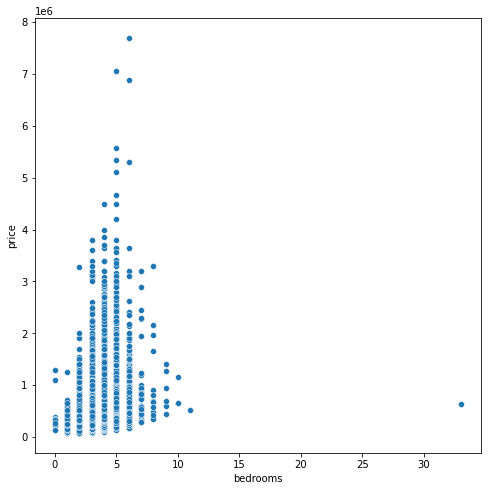

In [101]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=Data['bedrooms'], y= Data['price']);

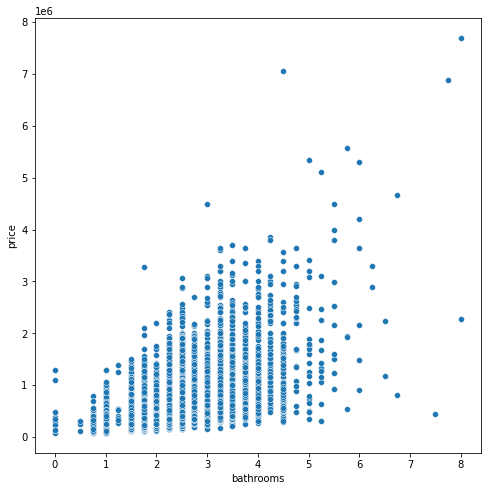

In [102]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=Data['bathrooms'], y= Data['price']);

In [105]:
px.scatter(x=Data['bathrooms'], y= Data['price'])

In [106]:
Data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above',
       'sqft_basement'],
      dtype='object')

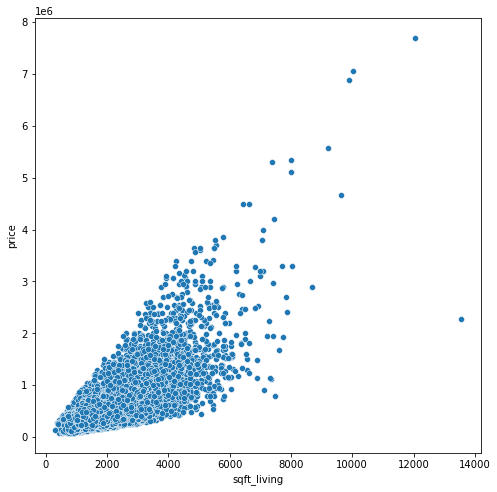

In [110]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=Data['sqft_living'], y= Data['price']);

<AxesSubplot:>

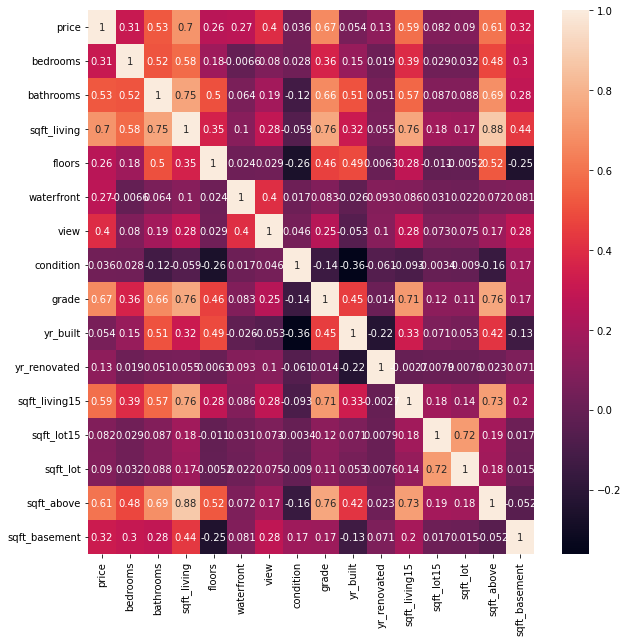

In [116]:
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(), annot=True)

In [120]:
Data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above',
       'sqft_basement'],
      dtype='object')

In [138]:
Data.drop('date', axis=1,inplace =True)

In [152]:
x = Data.drop('price',axis=1)
y = Data['price']

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [154]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [155]:
LR.coef_

array([-4.06631207e+04,  3.91705246e+04,  1.10207690e+02,  3.09464524e+04,
        5.45143770e+05,  4.28592827e+04,  2.15284102e+04,  1.20787156e+05,
       -3.54419932e+03,  1.08540255e+01,  2.42290373e+01, -5.50346356e-01,
        3.13100943e-02,  5.24027603e+01,  5.78049300e+01])

In [156]:
LR.intercept_

6138843.606313737

In [157]:
y_pred = LR.predict(x_test)

In [158]:
pd.DataFrame({'actual':y_test, 'predeicted':y_pred})

,actual,predeicted
3834,349950.0,499091.082636
1348,450000.0,559620.357289
20366,635000.0,469019.233039
16617,355500.0,419898.853818
20925,246950.0,247007.415580
...,...,...
1398,465000.0,432168.205118
3364,418000.0,453638.479571
18958,394250.0,604184.617063
17845,249500.0,167060.342124


In [159]:
from sklearn import metrics
metrics.mean_squared_error(y_pred,y_test)

47317465734.922676

In [160]:
(1/6484)*np.sum(np.square(y_pred-y_test))

47317465734.922676

In [161]:
LR.score(x_test,y_test)

0.6631370045164213